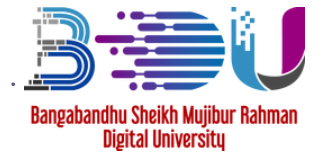

# Lab Report 13: ANN
## Name-Md Shahriar Hossain Apu
## Id-1901036

## Importing necessary Libraries

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Importing Dataset

In [7]:
#Loading Dataset
data = pd.read_csv("Churn_Modelling.csv")

## Generating Matrix of Features (X)

In [11]:
X = data.iloc[:,3:-1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [12]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
print(Y)

[1 0 1 ... 1 1 0]


In [13]:
#Encoding Categorical Variable Gender to male =1 and female-0
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [14]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [15]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [30]:
print(X_test)

[[-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
   1.61085707]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   0.49587037]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   0.71888467]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -1.54507805]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   1.61255917]]


## ANN Part

In [17]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [18]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [19]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [20]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [21]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [22]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5830 - accuracy: 0.7145
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4687 - accuracy: 0.8012
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8105
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.8189
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8236
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8292
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3852 - accuracy: 0.8371
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 0.8413
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8462
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3644 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8639
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8637
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8636
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8636
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8633
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8646
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8633
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8645
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8637
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 

## Predicting Result for Single Point Observation

In [23]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

1/1 [==============================] - 0s 152ms/step
[[False]]


In [28]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[3, 0, 0, 700, 2, 80, 9, 70000, 3, 0, 0,80000]])) > 0.5)

1/1 [==============================] - 0s 28ms/step
[[ True]]


In [26]:
#Saving created neural network
ann.save("ANN.h5")

C:\Users\Shahraiar Hossain\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
